# Classical model

#### Importing Libraries

In [15]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

#### Chose path

In [2]:
train_dir = "C:\\Users\\boltuzamaki\\Desktop\\NLP\\aclImdb\\train"
save_path = "C:\\Users\\boltuzamaki\\Desktop\\NLP\\aclImdb"
test_dir = "C:\\Users\\boltuzamaki\\Desktop\\NLP\\aclImdb\\test"

#### Prepare dataset in form of CSV

In [3]:
# Function which direct change all txt files along with labels to csv files

review = []
texts_n = []

def txt_2_csv(path,type_s ="train"):
    path_save = type_s+".csv"
    os.chdir(train_dir)
    list1 = os.listdir()
    for l in list1:
        os.chdir(train_dir+"\\"+l)
        texts = os.listdir()
        
        for text in texts:
            f = open(text, 'r', encoding="utf-8")
            new = f.read()
            texts_n.append(new)
            review.append(l)
            f.close()
        os.chdir("..")   
    # dictionary of lists  
    dict = {'text': texts_n, 'review': review}  
    df = pd.DataFrame(dict) 
    os.chdir(save_path)
    # saving the dataframe 
    df.to_csv(path_save,index = None)     

#### Loading data from csv

In [4]:
# Making CSV for train and testing 

txt_2_csv(train_dir)
txt_2_csv(test_dir, type_s = "test")

In [5]:
# Load train and text from created CSV

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [6]:
train_data.head()

,text,review
0,Story of a man who has unnatural feelings for ...,neg
1,Airport '77 starts as a brand new luxury 747 p...,neg
2,This film lacked something I couldn't put my f...,neg
3,"Sorry everyone,,, I know this is supposed to b...",neg
4,When I was little my parents took me along to ...,neg


In [7]:
train_data["text"][1]

"Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son. The luxury jetliner takes off as planned but mid-air the plane is hi-jacked by the co-pilot Chambers (Robert Foxworth) & his two accomplice's Banker (Monte Markham) & Wilson (Michael Pataki) who knock the passengers & crew out with sleeping gas, they plan to steal the valuable cargo & land on a disused plane strip on an isolated island but while making his descent Chambers almost hits an oil rig in the Ocean & loses control of the plane sending it crashing into the sea where it sinks to the bottom right bang in the middle of the Bermuda Triangle. With air in short supply, water leaking in & having flown over 200 miles off course the problems mount for 

####  Plotting number of counts of each class

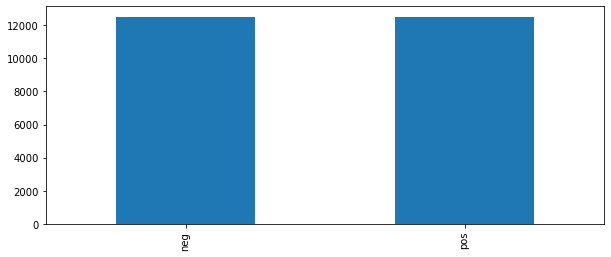

In [8]:
my_tags = ['pos','neg']
plt.figure(figsize=(10,4))
train_data.review.value_counts().plot(kind='bar');

#### Helper functions

In [20]:
def Unigram_BOW(data):                                                                    # Convert to Unigram BOW model
    count_vectorizer = CountVectorizer()
    bag_of_words = count_vectorizer.fit_transform(data)
    return bag_of_words


def stopwords_fun(text):                                                                   # Remove stopwords
    stopword = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = []
    for w in word_tokens:
        if w not in stopword:
            filtered_text.append(w)
    filtered_text1 = ' '.join(filtered_text)        
    return filtered_text1


def Feature_extraction(grams = "Uni", tfidf = True,combined_data = None, data = "train"  ):  # Convert Bigram BOW models
    if grams == "Uni":
        count_vectorizer = CountVectorizer()
        bow = count_vectorizer.fit(combined_data)
        dataf = bow.transform(data) 
        if tfidf==True:
            from sklearn.feature_extraction.text import TfidfTransformer 
            transformer = TfidfTransformer()
            tf_bow = transformer.fit(dataf)
            datat = tf_bow.transform(dataf)
            
    if grams == "Bi":
        count_vectorizer = CountVectorizer(ngram_range=(1,2))
        bow = count_vectorizer.fit(combined_data)
        dataf = bow.transform(data) 
        if tfidf==True:
            from sklearn.feature_extraction.text import TfidfTransformer 
            transformer = TfidfTransformer()
            tf_bow = transformer.fit(dataf)
            datat = tf_bow.transform(dataf)
             
    if grams == "Tri":
        count_vectorizer = CountVectorizer(ngram_range=(1,3))
        bow = count_vectorizer.fit(combined_data)
        dataf = bow.transform(data)
        if tfidf==True:
            from sklearn.feature_extraction.text import TfidfTransformer 
            transformer = TfidfTransformer()
            tf_bow = transformer.fit(dataf)
            datat = tf_bow.transform(dataf)
            
    if tfidf == True:
        return datat
    if tfidf == False:
        return dataf

    
def stochastic_descent(Xtrain, Ytrain, Xtest):                                                   # Stocastic Gradient Decent  
    from sklearn.linear_model import SGDClassifier
    from sklearn.model_selection import GridSearchCV
    parameters = {"penalty":['l2', 'l1', 'elasticnet'],
                  "max_iter":[5,10,15]
                  }
    clf =  GridSearchCV(SGDClassifier(), parameters)
    print ("SGD(Linear Support Vector Machine) Fitting")
    clf.fit(Xtrain, Ytrain)
    print ("SGD(Linear Support Vector Machine) Predicting")
    Ytest = clf.predict(Xtest)
    return Ytest,clf

def naive_bayes(Xtrain, Ytrain, Xtest):
    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB()
    print ("Naive Bayes Fitting")
    clf.fit(Xtrain, Ytrain)
    print ("SGD(Linear Support Vector Machine) Predicting")
    Ytest = clf.predict(Xtest)
    return Ytest,clf

def Logistic(Xtrain, Ytrain, Xtest):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    parameters = {"penalty":['l2', 'l1', 'elasticnet']
                  }
    clf =  GridSearchCV(LogisticRegression(), parameters)
    print ("Logistic Fitting")
    clf.fit(Xtrain, Ytrain)
    print ("SLogistic Predicting")
    Ytest = clf.predict(Xtest)
    return Ytest,clf
    
def accuracy(Ytrain, Ytest):                                                                       # Calculate accuracy
    assert (len(Ytrain)==len(Ytest))
    num =  sum([1 for i, word in enumerate(Ytrain) if Ytest[i]==word])
    n = len(Ytrain)  
    return (num*100)/n

def remove_punct(data):                                                                           # Remove punctuation marks
    from nltk.tokenize import word_tokenize
    token = word_tokenize(data)
    words = [word for word in token if word.isalpha()]
    words = ' '.join(words) 
    return words

def remove_html_tag(data):
    texts = [re.sub('<[^<]+?>', '', textl) for textl in data]
    return texts

#### Make list of train and test text

In [10]:
texts_train = train_data.text
text_X = remove_html_tag(texts_train)
texts_test = test_data.text
text_Y = remove_html_tag(texts_test)
review_train = train_data.review
review_test = test_data.review

#### Remove stopwords

In [11]:
text_train_withoutstop = []

for text in text_X:
    sen = stopwords_fun(text)
    sen = remove_punct(sen)
    text_train_withoutstop.append(sen) 

In [12]:

text_test_withoutstop = []
for text in text_Y:
    sen = stopwords_fun(text)
    sen = remove_punct(sen)
    text_test_withoutstop.append(sen)

#### Converting Categorical value to model feedable form change according to your need

In [13]:
Y_test = [1 if x=="pos" else 0 for x in review_test ]
Y_train = [1 if x=="pos" else 0 for x in review_train]

#### Joining test and train data fro creating BOW and Tfidf

In [14]:
full_text = text_test_withoutstop + text_train_withoutstop


#### Results For unigram without Tfidf


In [21]:
print("For Unigram BOW without Tfidf -->\n")
Uni_Bow_Tr = Feature_extraction(grams = "Uni", tfidf = False,combined_data = full_text,data = text_train_withoutstop ) 
Uni_Bow_Te = Feature_extraction(grams = "Uni", tfidf = False,combined_data = full_text,data = text_test_withoutstop ) 

Ytest_uni,clf1 = stochastic_descent(Uni_Bow_Tr, Y_train, Uni_Bow_Te)
print('accuracy %s' % accuracy(Ytest_uni, Y_test))
print(classification_report(Y_test, Ytest_uni,target_names=my_tags),"\n\n\n")

Ytest_uni,clf1 = naive_bayes(Uni_Bow_Tr, Y_train, Uni_Bow_Te)
print('accuracy %s' % accuracy(Ytest_uni, Y_test))
print(classification_report(Y_test, Ytest_uni,target_names=my_tags),"\n\n\n")

Ytest_uni,clf1 = Logistic(Uni_Bow_Tr, Y_train, Uni_Bow_Te)
print('accuracy %s' % accuracy(Ytest_uni, Y_test))
print(classification_report(Y_test, Ytest_uni,target_names=my_tags),"\n")

For Unigram BOW without Tfidf -->

SGD(Linear Support Vector Machine) Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD(Linear Support Vector Machine) Predicting
accuracy 91.472
              precision    recall  f1-score   support

         pos       0.92      0.90      0.91     25000
         neg       0.91      0.92      0.92     25000

    accuracy                           0.91     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.91      0.91      0.91     50000
 



Naive Bayes Fitting
SGD(Linear Support Vector Machine) Predicting
accuracy 91.044
              precision    recall  f1-score   support

         pos       0.89      0.94      0.91     25000
         neg       0.93      0.89      0.91     25000

    accuracy                           0.91     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.91      0.91      0.91     50000
 



Logistic Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

SLogistic Predicting
accuracy 99.788
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Results For Bigram without Tfidf

In [31]:
print("For Bigram BOW without Tfidf -->\n")
Bi_Bow_Tr = Feature_extraction(grams = "Bi", tfidf = False,combined_data = full_text,data = text_train_withoutstop ) 
Bi_Bow_Te = Feature_extraction(grams = "Bi", tfidf = False,combined_data = full_text,data = text_test_withoutstop )

Ytest_bi,clf1 = stochastic_descent(Bi_Bow_Tr, Y_train, Bi_Bow_Te)
print('accuracy %s' % accuracy(Ytest_bi, Y_test))
print(classification_report(Y_test, Ytest_bi,target_names=my_tags),"\n\n\n")

Ytest_bi,clf1 = naive_bayes(Bi_Bow_Tr, Y_train, Bi_Bow_Te)
print('accuracy %s' % accuracy(Ytest_bi, Y_test))
print(classification_report(Y_test, Ytest_bi,target_names=my_tags),"\n\n\n")

Ytest_bi,clf1 = Logistic(Bi_Bow_Tr, Y_train, Bi_Bow_Te)
print('accuracy %s' % accuracy(Ytest_bi, Y_test))
print(classification_report(Y_test, Ytest_bi,target_names=my_tags),"\n")

For Bigram BOW without Tfidf -->

SGD(Linear Support Vector Machine) Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD(Linear Support Vector Machine) Predicting
accuracy 99.992
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



Naive Bayes Fitting
SGD(Linear Support Vector Machine) Predicting
accuracy 99.792
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



Logistic Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

SLogistic Predicting
accuracy 100.0
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



#### Results For trigram without Tfidf

In [32]:
print("For Trigram BOW without Tfidf -->\n")
Tri_Bow_Tr = Feature_extraction(grams = "Tri", tfidf = False,combined_data = full_text,data = text_train_withoutstop )
Tri_Bow_te = Feature_extraction(grams = "Tri", tfidf = False,combined_data = full_text,data = text_test_withoutstop )

Ytest_tri,clf1 = stochastic_descent(Tri_Bow_Tr, Y_train, Tri_Bow_te)
print('accuracy %s' % accuracy(Ytest_tri, Y_test))
print(classification_report(Y_test, Ytest_tri,target_names=my_tags),"\n\n\n")

Ytest_tri,clf1 = naive_bayes(Tri_Bow_Tr, Y_train, Tri_Bow_te)
print('accuracy %s' % accuracy(Ytest_tri, Y_test))
print(classification_report(Y_test, Ytest_tri,target_names=my_tags),"\n\n\n")

Ytest_tri,clf1 = Logistic(Tri_Bow_Tr, Y_train, Tri_Bow_te)
print('accuracy %s' % accuracy(Ytest_tri, Y_test))
print(classification_report(Y_test, Ytest_tri,target_names=my_tags),"\n")

For Trigram BOW without Tfidf -->

SGD(Linear Support Vector Machine) Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD(Linear Support Vector Machine) Predicting
accuracy 99.984
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



Naive Bayes Fitting
SGD(Linear Support Vector Machine) Predicting
accuracy 99.984
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



Logistic Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

SLogistic Predicting
accuracy 100.0
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



#### Results For unigram with Tfidf

In [33]:
print("For Unigram BOW with Tfidf -->\n")
Uni_Tf_Tr = Feature_extraction(grams = "Uni", tfidf = True,combined_data = full_text,data = text_train_withoutstop ) 
Uni_Tf_Te = Feature_extraction(grams = "Uni", tfidf = True,combined_data = full_text,data = text_test_withoutstop )

Ytest_uni,clf1 = stochastic_descent(Uni_Tf_Tr, Y_train, Uni_Tf_Te)
print('accuracy %s' % accuracy(Ytest_uni, Y_test))
print(classification_report(Y_test, Ytest_uni,target_names=my_tags),"\n\n\n")

Ytest_uni,clf1 = naive_bayes(Uni_Tf_Tr, Y_train, Uni_Tf_Te)
print('accuracy %s' % accuracy(Ytest_uni, Y_test))
print(classification_report(Y_test, Ytest_uni,target_names=my_tags),"\n\n\n")

Ytest_uni,clf1 = Logistic(Uni_Tf_Tr, Y_train, Uni_Tf_Te)
print('accuracy %s' % accuracy(Ytest_uni, Y_test))
print(classification_report(Y_test, Ytest_uni,target_names=my_tags),"\n")

For Unigram BOW with Tfidf -->

SGD(Linear Support Vector Machine) Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD(Linear Support Vector Machine) Predicting
accuracy 88.376
              precision    recall  f1-score   support

         pos       0.90      0.87      0.88     25000
         neg       0.87      0.90      0.89     25000

    accuracy                           0.88     50000
   macro avg       0.88      0.88      0.88     50000
weighted avg       0.88      0.88      0.88     50000
 



Naive Bayes Fitting
SGD(Linear Support Vector Machine) Predicting
accuracy 91.428
              precision    recall  f1-score   support

         pos       0.90      0.93      0.92     25000
         neg       0.92      0.90      0.91     25000

    accuracy                           0.91     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.91      0.91      0.91     50000
 



Logistic Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


SLogistic Predicting
accuracy 93.524
              precision    recall  f1-score   support

         pos       0.94      0.93      0.93     25000
         neg       0.93      0.94      0.94     25000

    accuracy                           0.94     50000
   macro avg       0.94      0.94      0.94     50000
weighted avg       0.94      0.94      0.94     50000
 



#### Results For bigram with Tfidf

In [35]:
print("For Bigram BOW with Tfidf -->\n")
Bi_Tf_Tr = Feature_extraction(grams = "Bi", tfidf = True,combined_data = full_text,data = text_train_withoutstop ) 
Bi_Tf_Te = Feature_extraction(grams = "Bi", tfidf = True,combined_data = full_text,data = text_test_withoutstop ) 

Ytest_bi,clf1 = stochastic_descent(Bi_Tf_Tr, Y_train, Bi_Tf_Te)
print('accuracy %s' % accuracy(Ytest_bi, Y_test))
print(classification_report(Y_test, Ytest_bi,target_names=my_tags),"\n\n\n")

Ytest_bi,clf1 = naive_bayes(Bi_Tf_Tr, Y_train, Bi_Tf_Te)
print('accuracy %s' % accuracy(Ytest_bi, Y_test))
print(classification_report(Y_test, Ytest_bi,target_names=my_tags),"\n\n\n")

Ytest_uni,clf1 = Logistic(Bi_Tf_Tr, Y_train, Bi_Tf_Te)
print('accuracy %s' % accuracy(Ytest_bi, Y_test))
print(classification_report(Y_test, Ytest_bi,target_names=my_tags),"\n")


For Bigram BOW with Tfidf -->

SGD(Linear Support Vector Machine) Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD(Linear Support Vector Machine) Predicting
accuracy 96.844
              precision    recall  f1-score   support

         pos       0.98      0.96      0.97     25000
         neg       0.96      0.98      0.97     25000

    accuracy                           0.97     50000
   macro avg       0.97      0.97      0.97     50000
weighted avg       0.97      0.97      0.97     50000
 



Naive Bayes Fitting
SGD(Linear Support Vector Machine) Predicting
accuracy 98.764
              precision    recall  f1-score   support

         pos       0.99      0.99      0.99     25000
         neg       0.99      0.98      0.99     25000

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000
 



Logistic Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


SLogistic Predicting
accuracy 98.764
              precision    recall  f1-score   support

         pos       0.99      0.99      0.99     25000
         neg       0.99      0.98      0.99     25000

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000
 



#### Results For trigram with Tfidf

In [36]:
print("For Trigram BOW with Tfidf -->\n")
Tri_Tf_Tr =Feature_extraction(grams = "Tri", tfidf = True,combined_data = full_text,data = text_train_withoutstop ) 
Tri_Tf_Te = Feature_extraction(grams = "Tri", tfidf = True,combined_data = full_text,data = text_test_withoutstop ) 


Ytest_tri,clf1 = stochastic_descent(Tri_Tf_Tr, Y_train, Tri_Tf_Te)
print('accuracy %s' % accuracy(Ytest_tri, Y_test))
print(classification_report(Y_test, Ytest_tri,target_names=my_tags),"\n\n\n")

Ytest_tri,clf1 = naive_bayes(Tri_Tf_Tr, Y_train, Tri_Tf_Te)
print('accuracy %s' % accuracy(Ytest_tri, Y_test))
print(classification_report(Y_test, Ytest_tri,target_names=my_tags),"\n\n\n")

Ytest_tri,clf1 = Logistic(Tri_Tf_Tr, Y_train, Tri_Tf_Te)
print('accuracy %s' % accuracy(Ytest_tri, Y_test))
print(classification_report(Y_test, Ytest_tri,target_names=my_tags),"\n")

For Trigram BOW with Tfidf -->

SGD(Linear Support Vector Machine) Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD(Linear Support Vector Machine) Predicting
accuracy 97.54
              precision    recall  f1-score   support

         pos       0.98      0.97      0.98     25000
         neg       0.97      0.98      0.98     25000

    accuracy                           0.98     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.98      0.98      0.98     50000
 



Naive Bayes Fitting
SGD(Linear Support Vector Machine) Predicting
accuracy 99.78
              precision    recall  f1-score   support

         pos       1.00      1.00      1.00     25000
         neg       1.00      1.00      1.00     25000

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000
 



Logistic Fitting


c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\boltuzamaki\anaconda3\envs\pose\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


SLogistic Predicting
accuracy 97.348
              precision    recall  f1-score   support

         pos       0.98      0.97      0.97     25000
         neg       0.97      0.98      0.97     25000

    accuracy                           0.97     50000
   macro avg       0.97      0.97      0.97     50000
weighted avg       0.97      0.97      0.97     50000
 



#### Custom data test

In [42]:
Test = ["you are a fucking bad","you are amazing"]
test = Feature_extraction(grams = "Tri", tfidf = True,combined_data = full_text,data = Test )
clf1.predict(test)

array([0, 1])